# Stereology Analysis Template

> **INFO**  
> This is the template for using the stereology module. The specific documentation can be found at the following link:  
> https://github.com/marcoalopez/GrainSizeTools/wiki/3.-Using-the-stereology-module 
>
> The template shows typical examples of using the stereology module with grain size populations and different strategies for presenting them. Modify, delete and add as necessary to create your own analysis procedure.
>
> If you find any error in this template, please report them at https://github.com/marcoalopez/GrainSizeTools/issues  
> If you have any questions or suggestions open a discussion at https://github.com/marcoalopez/GrainSizeTools/discussions

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the script. It is assumed that the notebook is in the same folder
# as the GrainSizeTools.py file, if not specify the full path to the file.
# e.g. %run filepath...\GrainSizeTools_script.py
%run GrainSizeTools_script.py


Welcome to GrainSizeTools script
A free open-source cross-platform script to visualize and characterize grain size
population and estimate differential stress via paleopizometers.

Version: 3.2.0
Documentation: https://github.com/marcoalopez/GrainSizeTools/wiki

Type function_list() to get a list of the main methods

To access the piezometry module and the piezometer database, enter the following
command: %run piezometers.py

module plot imported
module averages imported
module stereology imported
module template imported


## Data reading

In [3]:
# specify the file(s) to be analysed here
dataset = pd.read_csv('DATA\data_set.txt', sep='\t')

In [4]:
# estimate Equivalent Circular Diameters based on areas (if neccesary)
dataset['diameters'] = 2 * np.sqrt(dataset['Area'] / np.pi)

# display a view of the dataset 
dataset

Area   Circ    Feret  FeretX  FeretY  FeretAngle  MinFeret     AR  \
0      157.25  0.680   18.062  1535.0     0.5     131.634    13.500  1.101   
1     2059.75  0.771   62.097   753.5    16.5     165.069    46.697  1.314   
2     1961.50  0.842   57.871   727.0    65.0      71.878    46.923  1.139   
3     5428.50  0.709  114.657  1494.5    83.5      19.620    63.449  1.896   
4      374.00  0.699   29.262  2328.0    34.0      33.147    16.000  1.515   
...       ...    ...      ...     ...     ...         ...       ...    ...   
2656   452.50  0.789   28.504  1368.0  1565.5     127.875    22.500  1.235   
2657  1081.25  0.756   47.909  1349.5  1569.5     108.246    31.363  1.446   
2658   513.50  0.720   32.962  1373.0  1586.0     112.286    20.496  1.493   
2659   277.75  0.627   29.436  1316.0  1601.5     159.102    17.002  1.727   
2660   725.00  0.748   39.437  1335.5  1615.5     129.341    28.025  1.351   

      Round  Solidity  diameters  
0     0.908     0.937  14.149803  
1     0.761     0.972  51.210889  
2     0.878     0.972  49.974587  
3     0.528     0.947  83.137121  
4     0.660     0.970  21.821815  
...     ...       ...        ...  
2656  0.810     0.960  24.002935  
2657  0.692     0.960  37.103777  
2658  0.670     0.953  25.569679  
2659  0.579     0.920  18.805379  
2660  0.740     0.960  30.382539  

[2661 rows x 11 columns]

# Saltykov method

volume fraction (up to 50 microns) = 41.65 %
calculated bin size = 14.24


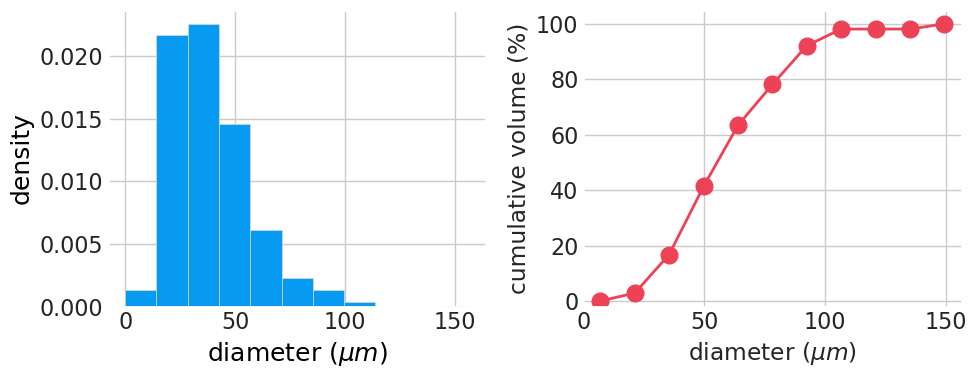

In [5]:
fig1, (ax1, ax2) = stereology.Saltykov(dataset['diameters'], numbins=11, calc_vol=50)

In [6]:
# uncomment the line below to save the figure
#fig1.savefig('saltykov_plot.png', dpi=300)

In [7]:
# get histogram data (using return_data=True)
mid_points, frequencies = stereology.Saltykov(dataset['diameters'], numbins=11, return_data=True)

In [8]:
# print the values of the calculated histogram
print(f"frequencies: {np.around(frequencies, 4)}")
print(f"bin midpoints: {np.around(mid_points, 1)}")

frequencies: [0.0013 0.0217 0.0226 0.0146 0.0061 0.0022 0.0013 0.0004 0.     0.
 0.    ]
bin midpoints: [  7.1  21.4  35.6  49.8  64.1  78.3  92.5 106.8 121.  135.2 149.5]


The file saltykov.tsv was created
calculated bin size = 10.44


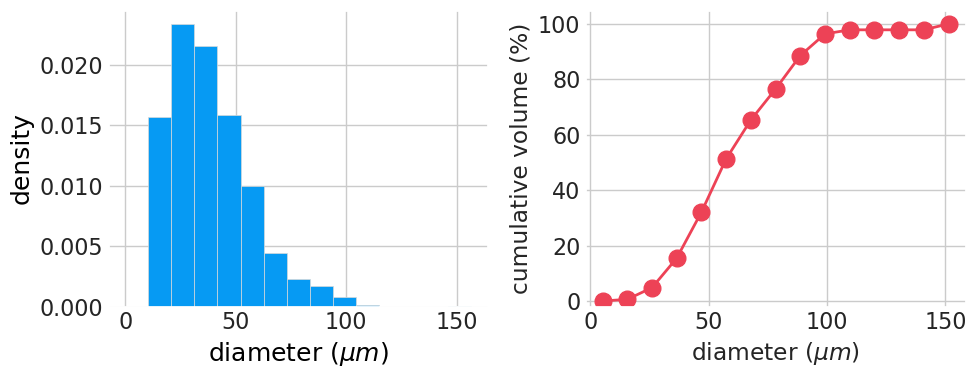

In [9]:
# save a tabular file with the saltykov data using text_file, here we use a tab-separated values (TSV) 
_ = stereology.Saltykov(dataset['diameters'], numbins=15, text_file='saltykov.tsv')

## The two-step method

PREDICTED OPTIMAL VALUES
Number of classes: 11
MSD (lognormal shape) = 1.63 ± 0.06
Geometric mean (scale) = 36.05 ± 1.27


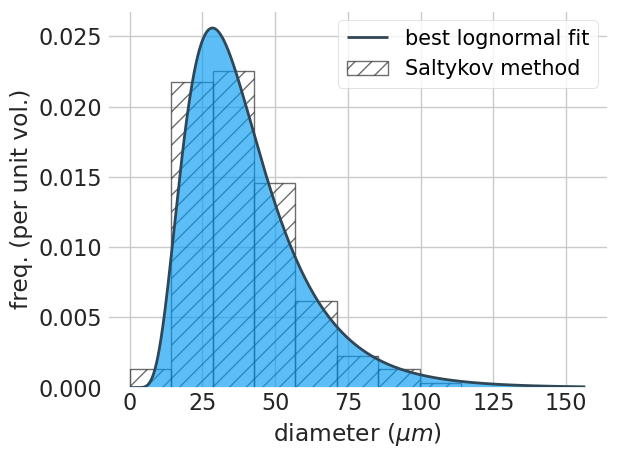

In [10]:
fig2, axe = stereology.two_step(dataset['diameters'])

In [11]:
# uncomment the line below to save the figure
#fig2.savefig('two_step_plot.png', dpi=300)

## Estimation of volume fractions from a calculated lognormal distribution

In [12]:
# lognormal parameters
geomean = 36.05
std = np.log(1.63)  # log(MSD)

# set min and max grain size in the population
min_size = 0
max_size = dataset['diameters'].max()


# get the volume fraction of a specific grain size
stereology.calc_volume_fraction(lognorm_params=(geomean, std),
                                total_size_range=(min_size, max_size),
                                interest_size_range=(0, 50))

Volume fraction occupied by grains between 0 and 50 microns: 22.7 %


0.22693747883065515

In [13]:
stereology.calc_volume_fraction(lognorm_params=(geomean, std),
                                total_size_range=(min_size, max_size),
                                interest_size_range=(10, 80))

Volume fraction occupied by grains between 10 and 80 microns: 60.3 %


0.6030751209186476

In [14]:
# annotate the date you executed the notebook and the Python version 
import sys
from datetime import date    
today = date.today().isoformat()

print(f'Notebook last run in {today} using:')
print('Python', sys.version)
print('Numpy', np.__version__)
print('Pandas', pd.__version__)

Notebook last run in 2024-06-26 using:
Python 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:16:22) [MSC v.1916 64 bit (AMD64)]
Numpy 1.26.4
Pandas 2.2.2
